# 6/22 코로나보드 '오늘' 데이터 스크랩

In [18]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')

from selenium import webdriver
from bs4 import BeautifulSoup


# 웹드라이버 불러와서 버튼 설정하기

driver = webdriver.Chrome('../chromedriver_90')
url = 'https://coronaboard.kr/'
driver.get(url)
import time
time.sleep(3)

from selenium.webdriver import ActionChains
some_tag = driver.find_element_by_id('show-more')
ActionChains(driver).move_to_element(some_tag).perform()
some_tag.click()

ActionChains(driver).move_to_element(some_tag).perform()
some_tag.click()

some_tag = driver.find_element_by_xpath('//*[@id="global-slide"]/div/div[2]/div/div/button')
ActionChains(driver).move_to_element(some_tag).perform()
some_tag.click()

driver.find_element_by_xpath('//*[@id="bs-select-1-0"]').click()
driver.find_element_by_xpath('//*[@id="bs-select-1-1"]').click()
driver.find_element_by_xpath('//*[@id="bs-select-1-5"]').click()



# 차트 데이터 긁어와서 데이터프레임으로 만들기


all_data = []
for i in range(2, 12):
    tmp = '//*[@id="country-table"]/div/div/table/tbody/tr/td[{}]'.format(i)
    sel_ele = driver.find_elements_by_xpath(tmp)

    column_data = []
    for one in sel_ele:
        column_data.append(one.text)

    print( len(sel_ele) )
    all_data.append(column_data)
    print(column_data)
    print()

all_data

import pandas as pd
dict_dat = { "국가":all_data[0],
 "확진자":all_data[1],
 "치료중":all_data[2],
 "위중증":all_data[3],
 "사망자":all_data[4],
 "완치":all_data[5],
 "치명(%)":all_data[6],
 "완치(%)":all_data[7],
 "발생률":all_data[8],
 "인구수":all_data[9]
 }
dat = pd.DataFrame(dict_dat)
dat

221
['미국🇺🇸', '인도🇮🇳', '브라질🇧🇷', '프랑스🇫🇷', '터키🇹🇷', '러시아🇷🇺', '영국🇬🇧', '아르헨티나🇦🇷', '이탈리아🇮🇹', '콜롬비아🇨🇴', '스페인🇪🇸', '독일🇩🇪', '이란🇮🇷', '폴란드🇵🇱', '멕시코🇲🇽', '우크라이나🇺🇦', '페루🇵🇪', '인도네시아🇮🇩', '남아프리카 공화국🇿🇦', '네덜란드🇳🇱', '체코🇨🇿', '칠레🇨🇱', '캐나다🇨🇦', '필리핀🇵🇭', '이라크🇮🇶', '스웨덴🇸🇪', '루마니아🇷🇴', '벨기에🇧🇪', '파키스탄🇵🇰', '포르투갈🇵🇹', '방글라데시🇧🇩', '이스라엘🇮🇱', '헝가리🇭🇺', '일본🇯🇵*', '요르단🇯🇴', '세르비아🇷🇸', '말레이시아🇲🇾', '스위스🇨🇭', '오스트리아🇦🇹', '네팔🇳🇵', '아랍에미레이트🇦🇪', '레바논🇱🇧', '모로코🇲🇦', '사우디아라비아🇸🇦', '에콰도르🇪🇨', '볼리비아🇧🇴', '불가리아🇧🇬', '그리스🇬🇷', '벨라루스🇧🇾', '카자흐스탄🇰🇿', '파라과이🇵🇾', '파나마🇵🇦', '슬로바키아🇸🇰', '튀니지🇹🇳', '조지아🇬🇪', '크로아티아🇭🇷', '우루과이🇺🇾', '코스타리카🇨🇷', '쿠웨이트🇰🇼', '아제르바이잔🇦🇿', '도미니카 공화국🇩🇴', '팔레스타인🇵🇸', '덴마크🇩🇰', '과테말라🇬🇹', '리투아니아🇱🇹', '이집트🇪🇬', '에티오피아🇪🇹', '아일랜드🇮🇪', '바레인🇧🇭', '베네수엘라🇻🇪', '슬로베니아🇸🇮', '몰도바🇲🇩', '온두라스🇭🇳', '오만🇴🇲', '스리랑카🇱🇰', '태국🇹🇭', '아르메니아🇦🇲', '카타르🇶🇦', '보스니아 헤르체고비나🇧🇦', '리비아🇱🇾', '케냐🇰🇪', '쿠바🇨🇺', '나이지리아🇳🇬', '북마케도니아🇲🇰', '대한민국🇰🇷', '미얀마🇲🇲', '라트비아🇱🇻', '알제리🇩🇿', '잠비아🇿🇲', '알바니아🇦🇱', '에스토니아🇪🇪', '노르웨이🇳🇴', '키르기스스탄🇰🇬', '아프가니스탄🇦🇫', '코소보🇽🇰', '우즈베키스탄🇺🇿', '몬테네그로🇲🇪', '몽골🇲🇳', '가나🇬🇭', '핀란드🇫🇮', '중국🇨🇳', 

221
['3,942\n(-15)', '8,944', '8,318', '1,655\n(-48)', '808\n(-5)', '2,300', '223\n(+13)', '7,345\n(-21)', '385\n(-4)', '8,155', '793', '889\n(-321)', '3,249\n(-9)', '224\n(-18)', '4,798', '177', '2,528\n(+7)', 'N/A', '546', '193', '10\n(+2)', '3,236\n(+6)', '535\n(-32)', '2,029', '539', '73\n(+2)', '151\n(-7)', '204\n(-8)', '2,179\n(-59)', '97', '1,183\n(-34)', '25\n(+1)', '32\n(-5)', '718', '470', '21', '875\n(-5)', '59\n(-5)', '76\n(-4)', 'N/A', 'N/A', '67', '107', '1,489', '453\n(-3)', '200', '200\n(-7)', '283\n(-13)', 'N/A', '221', '577\n(+6)', '105', '30\n(-5)', '484\n(+60)', 'N/A', '16\n(-3)', '379\n(-16)', '459\n(-13)', '227\n(+23)', 'N/A', '465', '8\n(-1)', '18\n(+1)', '5', '49\n(-7)', '90', '204\n(+3)', '13\n(-2)', '164\n(-1)', '287', '33\n(-2)', '56\n(+2)', '548\n(+6)', '443\n(+15)', 'N/A', '1,436', 'N/A', '72\n(-2)', 'N/A', 'N/A', '113', '161\n(+15)', '11', '25', '135\n(-2)', 'N/A', '42', '29', '1,119\n(+96)', '3', '4\n(-1)', '7', '102', '1,124', 'N/A', '23', '6', '126', '9

221
['83.6', '96.5', '90.6', '96.7', '97.4', '91.4', '92.7', '91.4', '95.2', '92.9', '94.6', '96.7', '88.9', '92.1', '79.7', '96.5', 'N/A', '89.7', '90.4', 'N/A', '98.0', '95.4', '97.4', '94.4', '93.2', 'N/A', '96.8', '94.2', '94.2', '94.7', '91.6', '99.2', '91.1', '95.3', '97.8', '98.6', '90.6', '96.3', '98.0', '90.2', '96.6', '97.6', '97.6', '96.2', '93.0', '80.6', '93.4', '95.5', '98.2', '94.1', '85.0', '95.7', '96.6', '87.3', '96.2', '97.6', '91.7', '78.6', '94.2', '98.2', '81.7', '97.9', '97.7', '90.7', '95.5', '74.2', '92.8', '94.0', '96.8', '92.5', '97.7', '97.3', '36.1', '87.6', '83.3', '83.3', '96.4', '98.9', '88.0', '92.4', '68.6', '94.3', '97.9', '96.3', '94.7', '90.0', '96.9', '69.6', '83.7', '98.1', '96.9', '68.7', '90.9', '60.7', '97.9', '96.0', '98.1', '65.6', '97.8', '48.7', '94.4', '97.3', '92.4', '79.8', '97.8', '68.5', '96.8', '93.1', '98.5', '90.6', '99.4', '57.9', '98.8', '87.9', '96.4', '88.2', '96.0', '73.7', '84.2', '82.7', '94.2', '97.0', '84.9', '71.1', '98.5'

,국가,확진자,치료중,위중증,사망자,완치,치명(%),완치(%),발생률,인구수
0,미국🇺🇸,"34,419,838\n(+13,779)","5,034,868\n(-42,709)","3,942\n(-15)","617,463\n(+297)","28,767,507\n(+56,191)",1.8,83.6,"103,987","331,002,651"
1,인도🇮🇳,"29,977,861\n(+12,569)","662,521\n(-18,767)","8,944","389,302\n(+474)","28,926,038\n(+30,862)",1.3,96.5,"21,723","1,380,004,385"
2,브라질🇧🇷,"17,969,806\n(+41,878)","1,178,597\n(-27,175)","8,318","502,817\n(+899)","16,288,392\n(+68,154)",2.8,90.6,"84,540","212,559,417"
3,프랑스🇫🇷,"5,757,798\n(+487)","80,626\n(-9,361)","1,655\n(-48)","110,778\n(+40)","5,566,394\n(+9,808)",1.9,96.7,"88,210","65,273,511"
4,터키🇹🇷,"5,375,593\n(+5,294)","88,626\n(+150)",808\n(-5),"49,236\n(+51)","5,237,731\n(+5,093)",0.9,97.4,"63,738","84,339,067"
...,...,...,...,...,...,...,...,...,...,...
216,마셜 제도🇲🇭,4,0,N/A,0,4,-,100,68,"59,190"
217,바누아투🇻🇺,4,0,N/A,1,3,25,75,13,"307,145"
218,사모아🇼🇸,3,0,N/A,0,3,-,100,15,"198,414"
219,세인트헬레나🇸🇭,2,0,N/A,0,2,-,100,329,"6,077"


In [24]:
##확인
for i in range(10):
    print(len(all_data[i]))

221
221
221
221
221
221
221
221
221
221


In [19]:
#합계값과 1일값 나누기

dat['확진자_합계'] = dat['확진자'].str.split('\n').str[0]
dat['확진자1일'] = dat['확진자'].str.split('\n').str[1]

dat['치료중_합계'] = dat['치료중'].str.split('\n').str[0]
dat['치료중1일'] = dat['치료중'].str.split('\n').str[1]

dat['위중증_합계'] = dat['위중증'].str.split('\n').str[0]
dat['위중증1일'] = dat['위중증'].str.split('\n').str[1]

dat['사망자합계'] = dat['사망자'].str.split('\n').str[0]
dat['사망자1일'] = dat['사망자'].str.split('\n').str[1]

dat['완치합계'] = dat['완치'].str.split('\n').str[0]
dat['완치1일'] = dat['완치'].str.split('\n').str[1]

dat = dat.drop( [ '확진자', '치료중','위중증','사망자', '완치'], axis=1)
dat.head()

,국가,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,치료중_합계,치료중1일,위중증_합계,위중증1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,1.8,83.6,"103,987","331,002,651","34,419,838","(+13,779)","5,034,868","(-42,709)","3,942",(-15),"617,463",(+297),"28,767,507","(+56,191)"
1,인도🇮🇳,1.3,96.5,"21,723","1,380,004,385","29,977,861","(+12,569)","662,521","(-18,767)","8,944",NaN,"389,302",(+474),"28,926,038","(+30,862)"
2,브라질🇧🇷,2.8,90.6,"84,540","212,559,417","17,969,806","(+41,878)","1,178,597","(-27,175)","8,318",NaN,"502,817",(+899),"16,288,392","(+68,154)"
3,프랑스🇫🇷,1.9,96.7,"88,210","65,273,511","5,757,798",(+487),"80,626","(-9,361)","1,655",(-48),"110,778",(+40),"5,566,394","(+9,808)"
4,터키🇹🇷,0.9,97.4,"63,738","84,339,067","5,375,593","(+5,294)","88,626",(+150),808,(-5),"49,236",(+51),"5,237,731","(+5,093)"


In [20]:
#특수문자 제거

dat['확진자_합계'] = dat['확진자_합계'].str.replace(pat=r'[,]', repl=r'', regex=True)
dat['확진자1일'] = dat['확진자1일'].str.replace(pat=r'[,()]', repl=r'', regex=True)

dat['치료중_합계'] = dat['치료중_합계'].str.replace(pat=r'[,]', repl=r'', regex=True)
dat['치료중1일'] = dat['치료중1일'].str.replace(pat=r'[,()]', repl=r'', regex=True)

dat['위중증_합계'] = dat['위중증_합계'].str.replace(pat=r'[,]', repl=r'', regex=True)
dat['위중증1일'] = dat['위중증1일'].str.replace(pat=r'[,()]', repl=r'', regex=True)

dat['사망자합계'] = dat['사망자합계'].str.replace(pat=r'[,]', repl=r'', regex=True)
dat['사망자1일'] = dat['사망자1일'].str.replace(pat=r'[,()]', repl=r'', regex=True)

dat['완치합계'] = dat['완치합계'].str.replace(pat=r'[,]', repl=r'', regex=True)
dat['완치1일'] = dat['완치1일'].str.replace(pat=r'[,()]', repl=r'', regex=True)

dat['발생률'] = dat['발생률'].str.replace(pat=r'[,]', repl=r'', regex=True)
dat['인구수'] = dat['인구수'].str.replace(pat=r'[,]', repl=r'', regex=True)
dat.head()

,국가,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,치료중_합계,치료중1일,위중증_합계,위중증1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,1.8,83.6,103987,331002651,34419838,+13779,5034868,-42709,3942,-15,617463,+297,28767507,+56191
1,인도🇮🇳,1.3,96.5,21723,1380004385,29977861,+12569,662521,-18767,8944,NaN,389302,+474,28926038,+30862
2,브라질🇧🇷,2.8,90.6,84540,212559417,17969806,+41878,1178597,-27175,8318,NaN,502817,+899,16288392,+68154
3,프랑스🇫🇷,1.9,96.7,88210,65273511,5757798,+487,80626,-9361,1655,-48,110778,+40,5566394,+9808
4,터키🇹🇷,0.9,97.4,63738,84339067,5375593,+5294,88626,+150,808,-5,49236,+51,5237731,+5093


In [21]:
#일 확진자 많은 순서대로 내림차순 정렬

import pandas as pd
data_ = dat
data_['확진자1일'] = data_['확진자1일'].str.replace(pat=r'[,()+]', repl=r'', regex=True)
data_ = data_.astype({'확진자1일': 'float32'})
data_ = data_.sort_values("확진자1일",axis=0, ascending=False)
data_

,국가,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,치료중_합계,치료중1일,위중증_합계,위중증1일,사망자합계,사망자1일,완치합계,완치1일
2,브라질🇧🇷,2.8,90.6,84540,212559417,17969806,41878.0,1178597,-27175,8318,NaN,502817,+899,16288392,+68154
9,콜롬비아🇨🇴,2.5,92.9,77991,50882891,3968405,23239.0,181876,+3805,8155,NaN,100582,+648,3685947,+18786
5,러시아🇷🇺,2.4,91.4,36667,145934462,5350919,16715.0,331122,+5052,2300,NaN,130347,+546,4889450,+11117
0,미국🇺🇸,1.8,83.6,103987,331002651,34419838,13779.0,5034868,-42709,3942,-15,617463,+297,28767507,+56191
17,인도네시아🇮🇩,2.7,89.7,7378,273523615,2018113,13668.0,152686,+4958,N/A,NaN,55291,+335,1810136,+8375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,마셜 제도🇲🇭,-,100,68,59190,4,NaN,0,NaN,N/A,NaN,0,NaN,4,NaN
217,바누아투🇻🇺,25,75,13,307145,4,NaN,0,NaN,N/A,NaN,1,NaN,3,NaN
218,사모아🇼🇸,-,100,15,198414,3,NaN,0,NaN,N/A,NaN,0,NaN,3,NaN
219,세인트헬레나🇸🇭,-,100,329,6077,2,NaN,0,NaN,N/A,NaN,0,NaN,2,NaN


In [22]:
#일 확진자가 가장 많은 상위 10 국가 따로 떼기

data_top10 = data_.iloc[0:10 , :]
data_top10

,국가,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,치료중_합계,치료중1일,위중증_합계,위중증1일,사망자합계,사망자1일,완치합계,완치1일
2,브라질🇧🇷,2.8,90.6,84540,212559417,17969806,41878.0,1178597,-27175,8318,NaN,502817,+899,16288392,+68154
9,콜롬비아🇨🇴,2.5,92.9,77991,50882891,3968405,23239.0,181876,+3805,8155,NaN,100582,+648,3685947,+18786
5,러시아🇷🇺,2.4,91.4,36667,145934462,5350919,16715.0,331122,+5052,2300,NaN,130347,+546,4889450,+11117
0,미국🇺🇸,1.8,83.6,103987,331002651,34419838,13779.0,5034868,-42709,3942,-15,617463,+297,28767507,+56191
17,인도네시아🇮🇩,2.7,89.7,7378,273523615,2018113,13668.0,152686,+4958,N/A,NaN,55291,+335,1810136,+8375
1,인도🇮🇳,1.3,96.5,21723,1380004385,29977861,12569.0,662521,-18767,8944,NaN,389302,+474,28926038,+30862
12,이란🇮🇷,2.7,88.9,37114,83992949,3117336,11716.0,262414,+124,3249,-9,83217,+116,2771705,+11476
6,영국🇬🇧,2.8,92.7,68357,67886011,4640507,10467.0,208530,+8451,223,+13,127981,+5,4303996,+2011
18,남아프리카 공화국🇿🇦,3.2,90.4,30897,59308690,1832479,9160.0,117004,-110,546,NaN,58795,+93,1656680,+9177
7,아르헨티나🇦🇷,2.1,91.4,94641,45195774,4277395,8606.0,277070,-12463,7345,-21,89490,+447,3910835,+20622


In [23]:
#저장
dat.to_excel("coronaboard_0622_today.xlsx",index=False)
dat.to_csv("coronaboard_0622_today.csv",index=False)
data_top10.to_excel("coronaboard_0622_today_top10.xlsx", index=False)
data_top10.to_csv("coronaboard_0622_today_top10.csv", index=False)
os.listdir( os.getcwd() )

['.ipynb_checkpoints',
 'coronaboard_0622_today.csv',
 'coronaboard_0622_today.xlsx',
 'coronaboard_0622_today_top10.csv',
 'coronaboard_0622_today_top10.xlsx',
 'corona_board_crawling-Copy1.ipynb',
 'corona_board_crawling-Copy2.ipynb',
 'corona_board_crawling.ipynb',
 'today_corona.csv',
 'today_corona.xlsx',
 'today_corona_confirmed.xlsx',
 'today_corona_confirmed_ten.xlsx',
 '[Group]corona_board_crawling_0622.ipynb',
 '[Group]corona_board_crawling_chelsea.ipynb']

(10, 14)


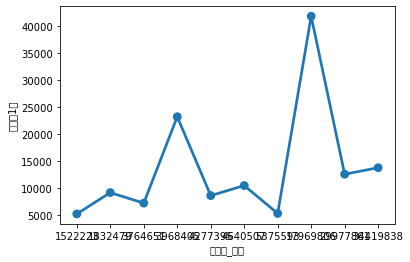

In [17]:
#판다스로 그래프 그리기

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
Today_corona = pd.read_excel('coronaboard_0622_today_top10.xlsx', index_col='국가')
print(Today_corona.shape)
Today_corona.head()
sns.pointplot(data=Today_corona, x='확진자_합계', y='확진자1일')
plt.show()